In [40]:
#Importing necessary libraries
import pandas as pd 
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
#Ignoring all the warnings
warnings.filterwarnings("ignore")

In [42]:
# Reading the data set 
Tit_df = pd.read_excel("Titanic_dataset.xlsx")
Tit_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
#Taking feature and outcome
Features = Tit_df[['Pclass','Sex','Age','Fare']]
Outcome = Tit_df['Survived']

In [44]:
Features['Age'].fillna(Features['Age'].mean(), inplace=True)

In [45]:
Sex_encoding = pd.get_dummies(Features['Sex'], dtype=int)

In [46]:
Features = pd.concat([Features,Sex_encoding], axis = 1)

In [48]:
Features.drop('Sex', axis = 'columns', inplace=True)

In [63]:
Features.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


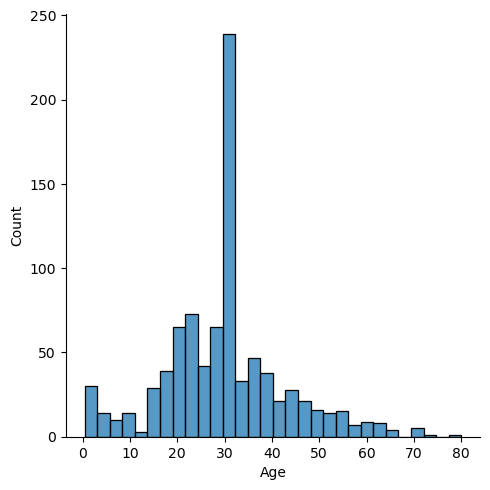

In [53]:
sns.displot(Features['Age'])

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Features, Outcome, test_size=0.2) 

In [52]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [54]:
model.fit(X_train, Y_train)

GaussianNB()

In [62]:
#Checking model score 
model.score(X_test, Y_test)

0.8156424581005587

In [61]:
#Taking Y test samples
Y_test[:10]

445    1
247    1
273    0
787    0
290    1
884    0
53     1
589    0
462    0
218    1
Name: Survived, dtype: int64

In [60]:
#Predicting for first 10 records
model.predict(X_test[:10])

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [59]:
#Identifying the Probab for first 10 rows
model.predict_proba(X_test[:10]) # Naive Bayes' will take max probab where it is survived or not survied

array([[0.44865784, 0.55134216],
       [0.04268152, 0.95731848],
       [0.91160703, 0.08839297],
       [0.98201277, 0.01798723],
       [0.00189399, 0.99810601],
       [0.98901918, 0.01098082],
       [0.04246692, 0.95753308],
       [0.98966758, 0.01033242],
       [0.89450862, 0.10549138],
       [0.00231728, 0.99768272]])